# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the data and Cleaning it

In [2]:
df = pd.read_csv('lung_cancer_data.csv')

In [3]:
df['Stage'].unique()

array(['Stage III', 'Stage I', 'Stage IV', 'Stage II'], dtype=object)

In [4]:
df.isnull().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [7]:
df.drop(['Patient_ID'], axis=1, inplace=True)

In [8]:
df.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [9]:
df.select_dtypes(include='object')

,Gender,Smoking_History,Tumor_Location,Stage,Treatment,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,Male,Current Smoker,Lower Lobe,Stage III,Surgery,Hispanic,Medicare,No,Yes,Yes,Yes,No,Yes,Yes,Yes
1,Male,Never Smoked,Lower Lobe,Stage I,Radiation Therapy,Caucasian,Private,Yes,Yes,Yes,No,No,Yes,Yes,No
2,Male,Former Smoker,Lower Lobe,Stage I,Chemotherapy,African American,Other,Yes,No,No,No,Yes,Yes,No,No
3,Male,Current Smoker,Lower Lobe,Stage III,Chemotherapy,African American,Medicare,Yes,Yes,No,Yes,No,Yes,Yes,No
4,Female,Never Smoked,Lower Lobe,Stage IV,Radiation Therapy,Asian,Medicaid,No,Yes,Yes,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,Male,Former Smoker,Middle Lobe,Stage I,Chemotherapy,Caucasian,Private,No,No,Yes,No,No,No,Yes,No
23654,Male,Current Smoker,Upper Lobe,Stage IV,Radiation Therapy,Asian,Other,No,Yes,Yes,No,No,Yes,No,Yes
23655,Male,Former Smoker,Upper Lobe,Stage IV,Chemotherapy,Asian,Private,Yes,Yes,Yes,Yes,No,Yes,Yes,No
23656,Female,Former Smoker,Middle Lobe,Stage I,Radiation Therapy,African American,Medicare,No,Yes,No,No,No,No,Yes,Yes


In [10]:
#Looking for types of columns that we have
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other']
Numerical columns : ['Age', 'Tumor_Size_mm', 'Survival_Months', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']


In [11]:
le = LabelEncoder()

columns_to_encode = ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,1,0,81.678677,0,2,2,44,3,1,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,1,2,78.448272,0,0,1,101,2,3,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,1,1,67.714305,0,0,0,69,0,2,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,1,0,70.806008,0,2,0,95,0,1,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,0,2,87.272433,0,3,1,105,1,0,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [13]:
df.tail()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
23653,45,1,1,91.279410,1,0,0,16,2,3,...,21.218709,37.642878,1.469665,203.209056,9.011784,3.083901,121.588210,3.874261,138.004367,8.877173
23654,31,1,0,45.139048,2,3,1,81,1,2,...,6.439687,45.747460,1.432533,245.095566,10.192073,4.571803,129.748104,4.635774,137.883562,33.573249
23655,74,1,1,89.640323,2,3,0,52,1,3,...,6.974531,20.982553,0.855960,214.793918,9.617543,4.877552,129.414306,3.730363,138.813953,26.893648
23656,47,0,1,45.770358,1,0,1,26,0,1,...,21.817365,43.457246,0.824516,138.947588,8.239170,2.885529,127.647028,3.799932,139.706111,26.387602
23657,64,1,1,13.460912,2,0,0,1,4,1,...,13.473113,37.588167,0.652503,166.011540,9.467378,3.432123,114.734285,4.688588,135.223702,37.972540


## Visualizing the data

In [14]:
print(df.columns.tolist())

['Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']


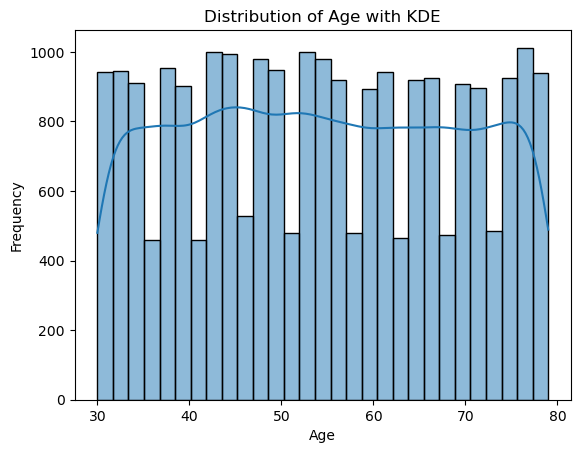

In [15]:
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age with KDE')
plt.show()

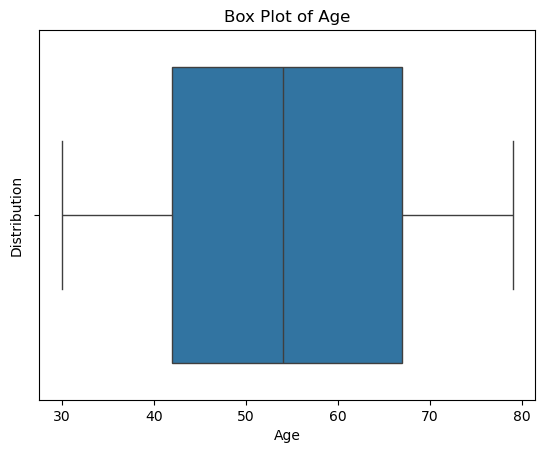

In [16]:
# Box plotting the Age column in order to find the outliers
sns.boxplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Box Plot of Age')
plt.show()

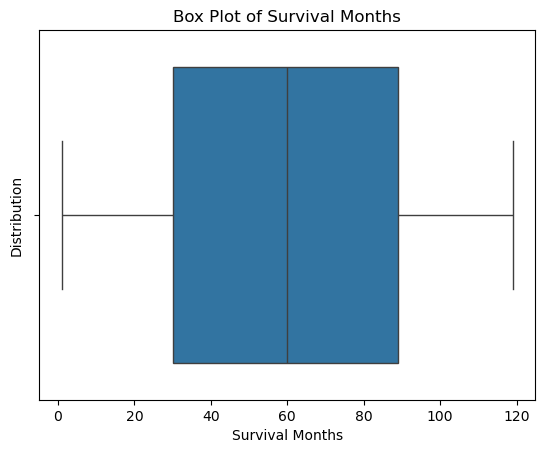

In [17]:
# Box plotting the Survival Monts column in order to find the outliers
sns.boxplot(data=df, x='Survival_Months')
plt.xlabel('Survival Months')
plt.ylabel('Distribution')
plt.title('Box Plot of Survival Months')
plt.show()

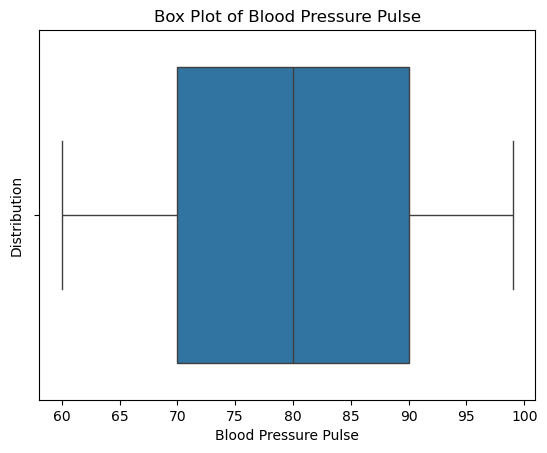

In [18]:
# Box plotting the Age column in order to find the outliers
sns.boxplot(data=df, x='Blood_Pressure_Pulse')
plt.xlabel('Blood Pressure Pulse')
plt.ylabel('Distribution')
plt.title('Box Plot of Blood Pressure Pulse')
plt.show()

In [19]:
# Mapping the gender to its original values in order to show proper indexing while visualizing it
gender_mapping = {0: 'Female', 1: 'Male'}

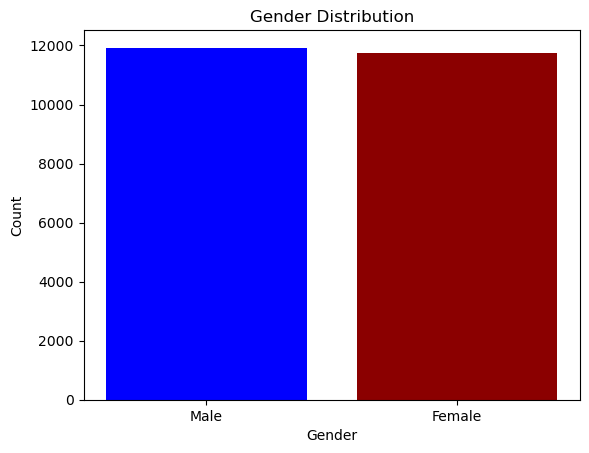

In [20]:
# Counting the occurrences of each gender
gender_counts = df['Gender'].map(gender_mapping).value_counts()

# Plotting the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=['blue', 'darkred'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [21]:
# Mapping Smoking History and Cancer Stage to its initial values
smokingHistory_mapping = {0:'Current Smoker', 1:'Former Smoker', 2:'Never Smoked'}
Stage_mapping = {0:'Stage I', 1:'Stage II', 2:'Stage III', 3:'Stage IV'}

<Figure size 1000x800 with 0 Axes>

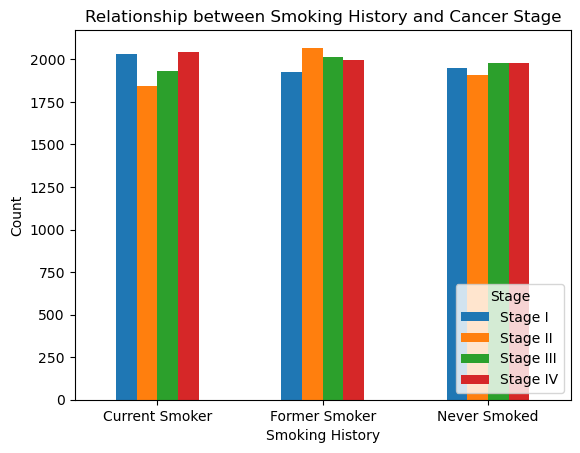

In [22]:
# Group by smoking history and stage, and count occurrences
grouped_counts = df.groupby(['Smoking_History', 'Stage']).size().unstack()

# Map numerical labels to their original string values
grouped_counts.index = grouped_counts.index.map(smokingHistory_mapping)
grouped_counts.columns = grouped_counts.columns.map(Stage_mapping)

# Plot the bar chart
plt.figure(figsize=(10, 8))
grouped_counts.plot(kind='bar',)
plt.xticks(rotation=0)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Relationship between Smoking History and Cancer Stage')
plt.legend(title='Stage', loc='lower right')
plt.show()

In [23]:
df['Treatment'].nunique()

4

In [24]:
# Mapping Treatment to its initial values
treatment_mapping = {0:'Chemotherapy', 1:'Radiation Therapy', 2:'Surgery', 3:'Targeted Therapy'}

<Figure size 1000x800 with 0 Axes>

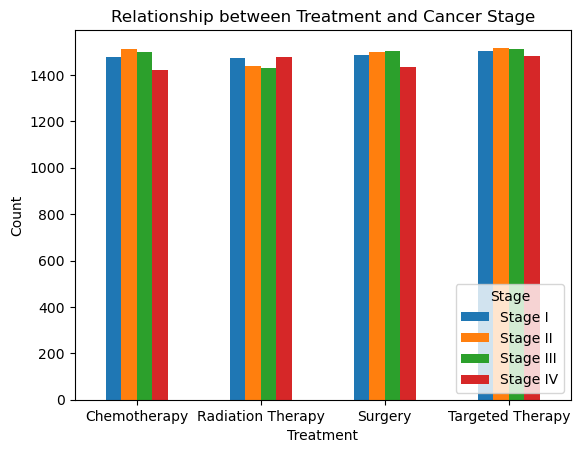

In [25]:
# Group by Treatment and Stage and counting occurrences
grouped = df.groupby(['Stage','Treatment']).size().unstack()

grouped.index = grouped.index.map(treatment_mapping)
grouped.columns = grouped.columns.map(Stage_mapping)

# Plot the bar chart
plt.figure(figsize=(10, 8))
grouped.plot(kind='bar',)
plt.xticks(rotation=0)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Relationship between Treatment and Cancer Stage')
plt.legend(title='Stage', loc='lower right')
plt.show()

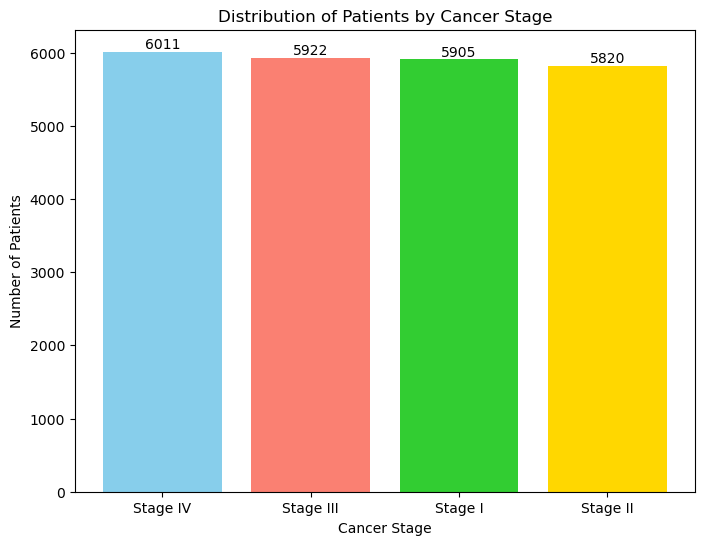

In [26]:
# Barplot of Stage
stage_count = df['Stage'].map(Stage_mapping).value_counts()

# Create a list of distinct colors for each stage
stage_colors = ['skyblue', 'salmon', 'limegreen', 'gold']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(stage_count.index, stage_count.values, color=stage_colors)
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Cancer Stage')

# Add stage labels above each bar
for i, count in enumerate(stage_count.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

In [27]:
# Verification of the number of patients visualized
df['Stage'].value_counts().get(0)

5905

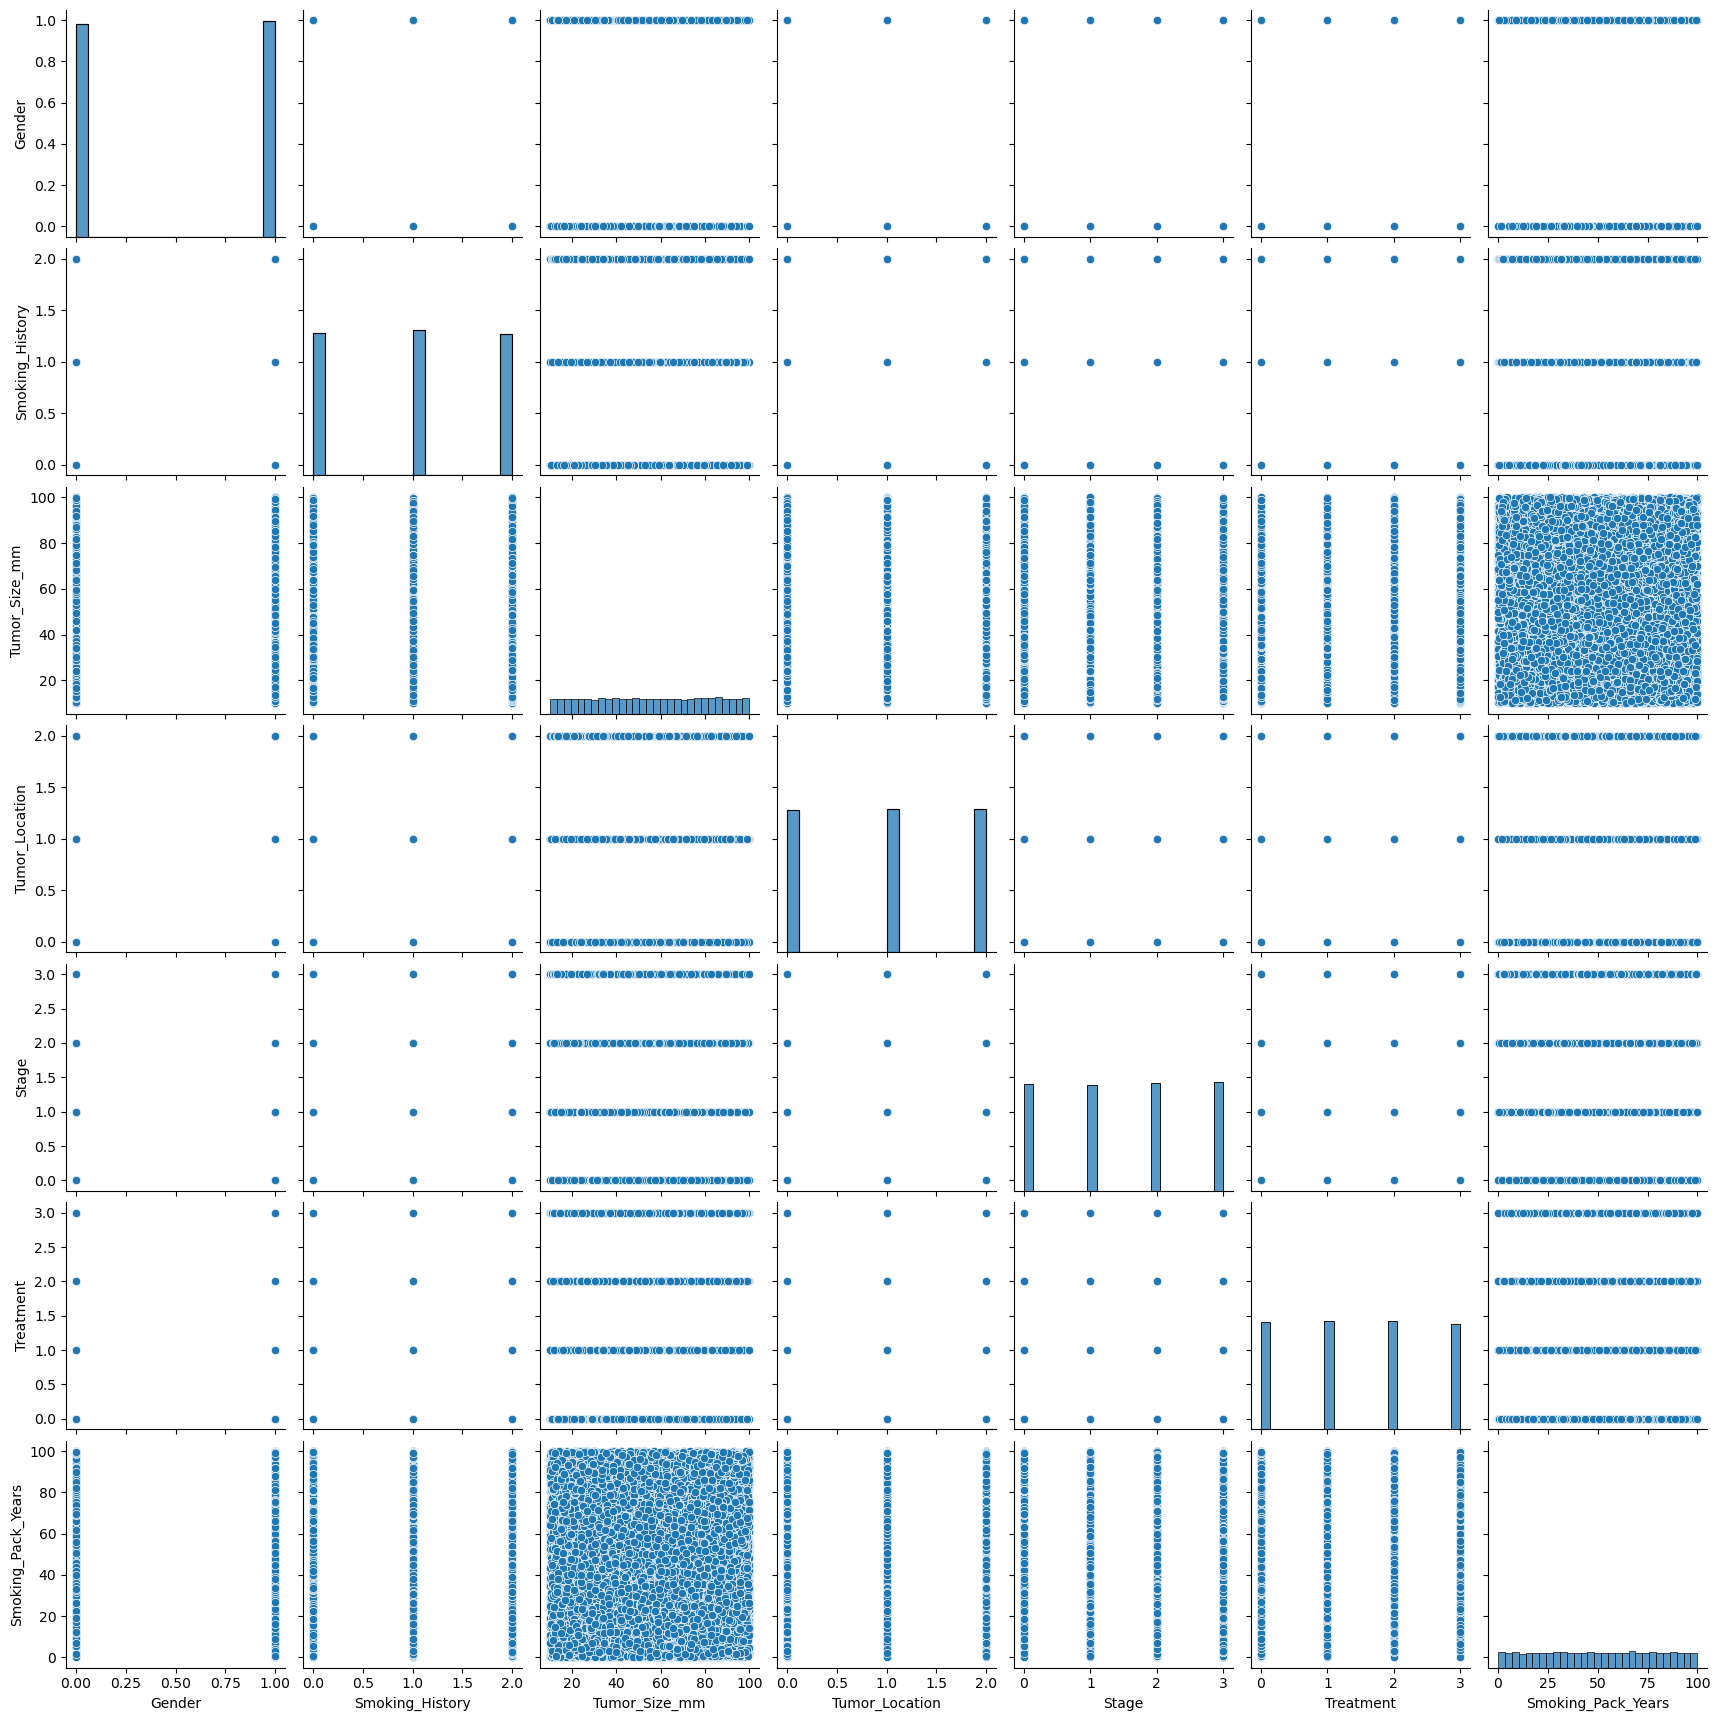

In [28]:
pair_columns = ['Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Smoking_Pack_Years']

pair_df = df[pair_columns]
sns.pairplot(pair_df)
plt.show()

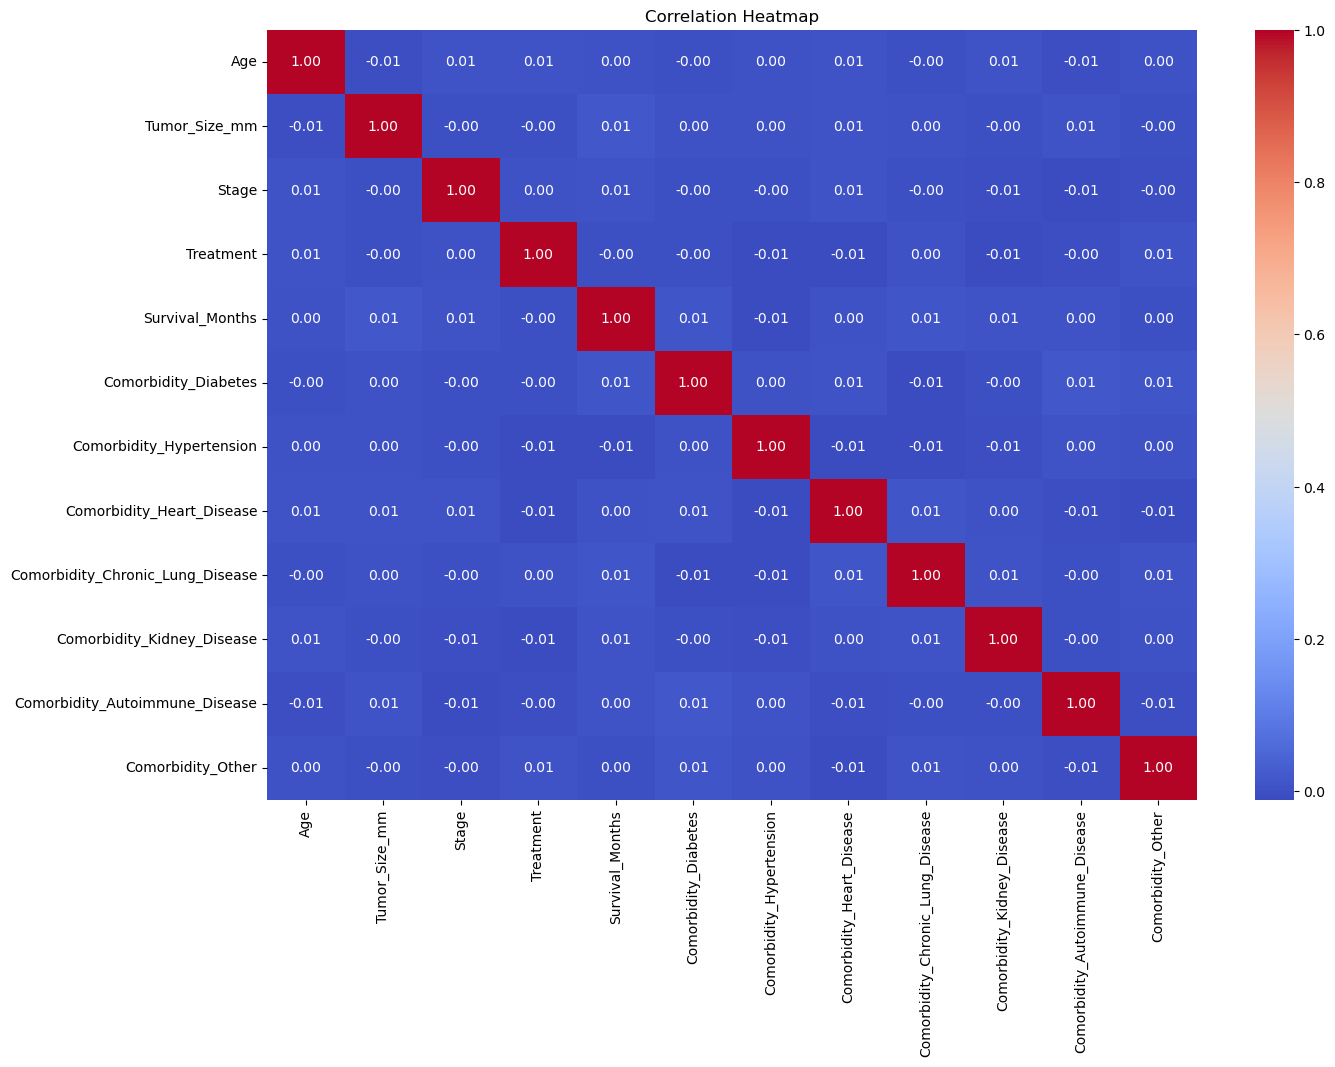

In [29]:
# Filtering columns to visualize a heatmap
selected_columns = [
    'Age', 'Tumor_Size_mm', 'Stage', 'Treatment', 'Survival_Months',
    'Comorbidity_Diabetes', 'Comorbidity_Hypertension',
    'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease',
    'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease',
    'Comorbidity_Other'
]

# Creating a subset of dataframe
subset_df = df[selected_columns]

# Correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

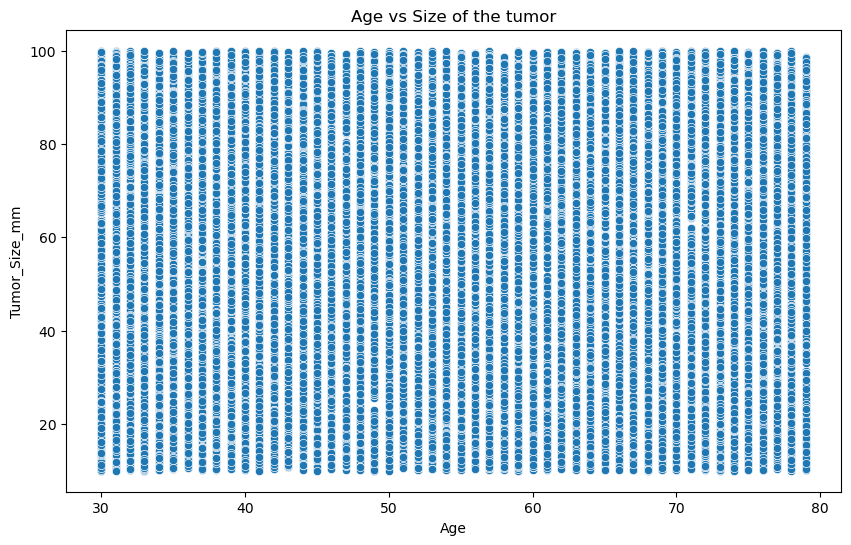

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Tumor_Size_mm', data=df)
plt.title('Age vs Size of the tumor')
plt.show()

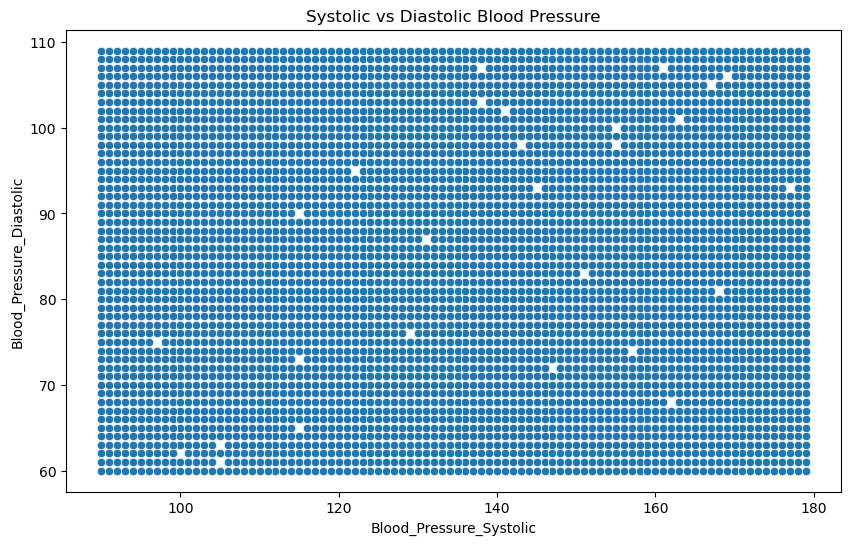

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Blood_Pressure_Systolic', y='Blood_Pressure_Diastolic', data=df)
plt.title('Systolic vs Diastolic Blood Pressure')
plt.show()

In [32]:
# Defining the required columns needed in predicting the stage of Lung Cancer and assigning it as feature_names
selected_features = ['Age', 'Gender', 'Tumor_Size_mm', 'Tumor_Location', 'Performance_Status', 'Hemoglobin_Level',
                     'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level',
                     'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level',
                     'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
                     'Sodium_Level', 'Smoking_Pack_Years']

X = df[selected_features]
y = df['Stage']

In [33]:
# Splitting the datasets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((17743, 20), (5915, 20))

In [34]:
# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.25
Random Forest Accuracy: 0.25
KNN Accuracy: 0.25
Logistic Regression Accuracy: 0.25
Decision Tree Accuracy: 0.25


In [36]:
print(y.value_counts(normalize=True))

Stage
3    0.254079
2    0.250317
0    0.249598
1    0.246006
Name: proportion, dtype: float64


In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with RFE and RandomForestClassifier
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)
pipeline = Pipeline([
    ('feature_selection', rfe),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Get selected feature columns
selected_columns = X.columns[rfe.support_]
print(selected_columns)

Index(['Tumor_Size_mm', 'Hemoglobin_Level', 'White_Blood_Cell_Count',
       'Alkaline_Phosphatase_Level', 'Aspartate_Aminotransferase_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Smoking_Pack_Years'],
      dtype='object')
